In [1]:
!nvidia-smi

Wed Oct 23 21:49:56 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:03:00.0 Off |                  N/A |
| 22%   40C    P8    14W / 250W |   1468MiB / 12212MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Quadro K600         Off  | 00000000:04:00.0 Off |                  N/A |
| 25%   

In [2]:
!pip install kaggle

Importing dataset

In [3]:
import os
# Create the .kaggle directory in the current working directory
os.makedirs('.kaggle', exist_ok=True)
# Move the kaggle.json file to the correct location
!cp kaggle.json .kaggle/

In [4]:
os.chmod('.kaggle/kaggle.json', 0o600)

In [5]:
#!/bin/bash
!kaggle datasets download kamal01/top-agriculture-crop-disease

Dataset URL: https://www.kaggle.com/datasets/kamal01/top-agriculture-crop-disease
License(s): CC0-1.0
top-agriculture-crop-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = '/home/Tiwari_ME/top-agriculture-crop-disease.zip'
extraction_path = '/home/Tiwari_ME/top-agriculture-crop-disease/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Dataset extracted to {extraction_path}")

Dataset extracted to /home/Tiwari_ME/top-agriculture-crop-disease/


# Analysing Dataset

In [7]:
import os

# List the files and directories in the extraction path
extraction_path = '/home/Tiwari_ME/top-agriculture-crop-disease/'
files = os.listdir(extraction_path)

print("Files and directories in the dataset:")
for file in files:
    print(file)

Files and directories in the dataset:
Crop Diseases


In [8]:
# Define the path to the 'Crop Diseases' directory
crop_diseases_path = os.path.join(extraction_path, 'Crop Diseases')

# List the files and directories in the 'Crop Diseases' directory
crop_diseases_files = os.listdir(crop_diseases_path)

print("Files and directories in 'Crop Diseases':")
for item in crop_diseases_files:
    print(item)


Files and directories in 'Crop Diseases':
Corn___Common_Rust
Corn___Gray_Leaf_Spot
Corn___Healthy
Corn___Northern_Leaf_Blight
Rice___Brown_Spot
Rice___Healthy
Rice___Leaf_Blast
Rice___Neck_Blast
Sugarcane_Bacterial Blight
Sugarcane_Healthy
Sugarcane_Red Rot
Wheat___Brown_Rust
Wheat___Healthy
Wheat___Yellow_Rust
Potato___Early_Blight
Potato___Healthy
Potato___Late_Blight


# Data Cleaning

In [9]:
import os
import shutil

# Define the path to the 'Crop Diseases' directory
crop_diseases_path = os.path.join(extraction_path, 'Crop Diseases')

# List of potato-related folders to remove
potato_folders = [
    'Potato___Early_Blight',
    'Potato___Healthy',
    'Potato___Late_Blight'
]

# Remove the potato folders
for folder in potato_folders:
    folder_path = os.path.join(crop_diseases_path, folder)
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)  # This will remove the folder and its contents
        print(f"Removed folder: {folder_path}")

print("All potato-related folders have been removed.")


Removed folder: /home/Tiwari_ME/top-agriculture-crop-disease/Crop Diseases/Potato___Early_Blight
Removed folder: /home/Tiwari_ME/top-agriculture-crop-disease/Crop Diseases/Potato___Healthy
Removed folder: /home/Tiwari_ME/top-agriculture-crop-disease/Crop Diseases/Potato___Late_Blight
All potato-related folders have been removed.


In [10]:
# Verify the remaining folders in 'Crop Diseases'
remaining_folders = os.listdir(crop_diseases_path)
print("\nRemaining folders in 'Crop Diseases':")
for folder in remaining_folders:
    print(folder)


Remaining folders in 'Crop Diseases':
Corn___Common_Rust
Corn___Gray_Leaf_Spot
Corn___Healthy
Corn___Northern_Leaf_Blight
Rice___Brown_Spot
Rice___Healthy
Rice___Leaf_Blast
Rice___Neck_Blast
Sugarcane_Bacterial Blight
Sugarcane_Healthy
Sugarcane_Red Rot
Wheat___Brown_Rust
Wheat___Healthy
Wheat___Yellow_Rust


# Visualising New Dataset


Number of images in each folder:
Corn___Common_Rust: 1192 images
Corn___Gray_Leaf_Spot: 513 images
Corn___Healthy: 1162 images
Corn___Northern_Leaf_Blight: 985 images
Rice___Brown_Spot: 613 images
Rice___Healthy: 1488 images
Rice___Leaf_Blast: 977 images
Rice___Neck_Blast: 1000 images
Sugarcane_Bacterial Blight: 100 images
Sugarcane_Healthy: 100 images
Sugarcane_Red Rot: 100 images
Wheat___Brown_Rust: 902 images
Wheat___Healthy: 1116 images
Wheat___Yellow_Rust: 924 images


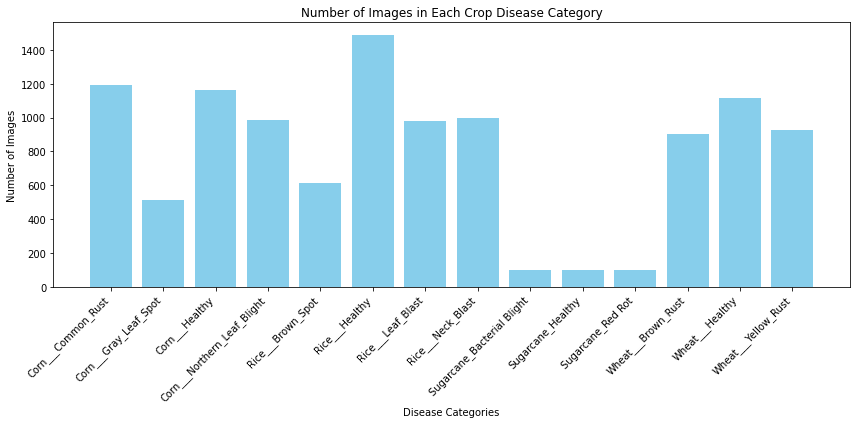

In [11]:
# Install the necessary libraries
!pip install matplotlib

# Import the necessary libraries
import os
import matplotlib.pyplot as plt

# Define the path to the 'Crop Diseases' directory
crop_diseases_path = os.path.join(extraction_path, 'Crop Diseases')

# Dictionary to store the number of images in each folder
image_counts = {}

# Count the number of images in each remaining folder
for folder in os.listdir(crop_diseases_path):
    folder_path = os.path.join(crop_diseases_path, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))  # Count the number of images
        image_counts[folder] = num_images

# Print the counts for verification
print("\nNumber of images in each folder:")
for folder, count in image_counts.items():
    print(f"{folder}: {count} images")

# Step 2: Visualize the counts using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
plt.xlabel('Disease Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Crop Disease Category')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [13]:
!pip install pytorch-lightning

     |████████████████████████████████| 527 kB 2.7 MB/s            
     |████████████████████████████████| 5.9 MB 2.7 MB/s            
     |████████████████████████████████| 491 kB 3.0 MB/s            
     |████████████████████████████████| 409 kB 1.8 MB/s            
     |████████████████████████████████| 952 kB 1.6 MB/s            
     |████████████████████████████████| 126 kB 2.8 MB/s            
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached grpcio-1.48.2-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
     |████████████████████████████████| 181 kB 2.9 MB/s            
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.3.0-py2

In [14]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pytorch_lightning as pl

# Assuming 'crop_diseases_path' is the directory after removing the potato folders
crop_diseases_path = os.path.join(extraction_path, 'Crop Diseases')

# Class labels (excluding potato classes)
class_names = [
    "Corn___Common_Rust", "Corn___Gray_Leaf_Spot", "Corn___Healthy", "Corn___Northern_Leaf_Blight",
    "Rice___Brown_Spot", "Rice___Healthy", "Rice___Leaf_Blast", "Rice___Neck_Blast",
    "Sugarcane_Bacterial Blight", "Sugarcane_Healthy", "Sugarcane_Red Rot",
    "Wheat___Brown_Rust", "Wheat___Healthy", "Wheat___Yellow_Rust"
]

# Transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224 (adjust as needed)
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize to ImageNet standards
])

# Load the dataset from the directory (after potato folders were removed)
train_dataset = datasets.ImageFolder(root=crop_diseases_path, transform=transform)

# Check if labels are assigned correctly
print(f"Class-to-index mapping: {train_dataset.class_to_idx}")

# DataLoader for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

# Inspecting dataset size
print(f"Number of samples: {len(train_dataset)}")


Class-to-index mapping: {'Corn___Common_Rust': 0, 'Corn___Gray_Leaf_Spot': 1, 'Corn___Healthy': 2, 'Corn___Northern_Leaf_Blight': 3, 'Rice___Brown_Spot': 4, 'Rice___Healthy': 5, 'Rice___Leaf_Blast': 6, 'Rice___Neck_Blast': 7, 'Sugarcane_Bacterial Blight': 8, 'Sugarcane_Healthy': 9, 'Sugarcane_Red Rot': 10, 'Wheat___Brown_Rust': 11, 'Wheat___Healthy': 12, 'Wheat___Yellow_Rust': 13}
Number of samples: 11172


In [15]:
class_info = {
    "Corn___Common_Rust": "Apply fungicides as soon as symptoms are noticed. Practice crop rotation and remove infected plants.",
    "Corn___Gray_Leaf_Spot": "Rotate crops to non-host plants, apply resistant varieties, and use fungicides as needed.",
    "Corn___Healthy": "Continue good agricultural practices: ensure proper irrigation, nutrient supply, and monitor for pests.",
    "Corn___Northern_Leaf_Blight": "Remove and destroy infected plant debris, apply fungicides, and rotate crops.",
    "Rice___Brown_Spot": "Use resistant varieties, improve field drainage, and apply fungicides if necessary.",
    "Rice___Healthy": "Maintain proper irrigation, fertilization, and pest control measures.",
    "Rice___Leaf_Blast": "Use resistant varieties, apply fungicides during high-risk periods, and practice good field management.",
    "Rice___Neck_Blast": "Plant resistant varieties, improve nutrient management, and apply fungicides if symptoms appear.",
    "Wheat___Brown_Rust": "Apply fungicides and practice crop rotation with non-host crops.",
    "Wheat___Healthy": "Continue with good management practices, including proper fertilization and weed control.",
    "Wheat___Yellow_Rust": "Use resistant varieties, apply fungicides, and rotate crops.",
    "Sugarcane__Red_Rot": "Plant resistant varieties and ensure good drainage.",
    "Sugarcane__Healthy": "Maintain healthy soil conditions and proper irrigation.",
    "Sugarcane__Bacterial Blight": "Use disease-free planting material, practice crop rotation, and destroy infected plants."
}


# Data Augmentation 

In [16]:
!pip install torch torchvision

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


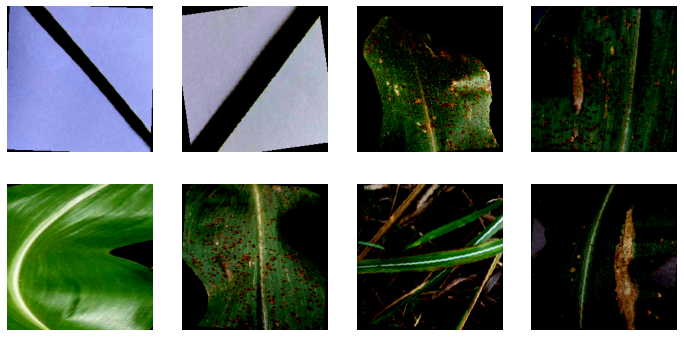

In [17]:
import os
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the pixel size for resizing
image_size = (224, 224)  # Resize images to 224x224 pixels

from torchvision import transforms

# Define data transformations including augmentation
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),  # Randomly rotate images
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Define the path to the 'Crop Diseases' directory
crop_diseases_path = os.path.join(extraction_path, 'Crop Diseases')

# Create a dataset
dataset = datasets.ImageFolder(root=crop_diseases_path, transform=data_transforms)

# Create a DataLoader
batch_size = 32  # Define your batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Example: Visualizing some augmented images
def visualize_augmented_images(dataloader):
    data_iter = iter(dataloader)
    images, labels = next(data_iter)

    # Convert tensor images back to numpy for visualization
    images = images.numpy().transpose((0, 2, 3, 1))  # Change the shape to (batch_size, height, width, channels)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    for i in range(8):  # Show 8 images
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()

# Visualize the augmented images
visualize_augmented_images(dataloader)

# Oversampling

In [18]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
from collections import Counter

# Define the path to the 'Crop Diseases' directory
crop_diseases_path = os.path.join(extraction_path, 'Crop Diseases')

# Create a dataset (assuming your augmentation is already applied elsewhere)
dataset = datasets.ImageFolder(root=crop_diseases_path)

# Count images in each class
class_counts = Counter(dataset.targets)  # dataset.targets contains class indices
max_count = max(class_counts.values())  # Find the maximum count

# Prepare weights for each class for oversampling
weights = []
for target in dataset.targets:
    weights.append(max_count / class_counts[target])  # Calculate weight for oversampling

# Create a WeightedRandomSampler
sampler = WeightedRandomSampler(weights, num_samples=max_count * len(class_counts), replacement=True)

# Create a DataLoader with the sampler
batch_size = 32  # Define your batch size
dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)

# Now you can use the dataloader for training your model

In [19]:
from collections import Counter
# Get the indices of the samples in the dataloader
sample_indices = [i for i, _ in enumerate(dataloader.dataset)]
# Count how many samples correspond to each class after oversampling
oversampled_class_counts = Counter(dataloader.dataset.targets[i] for i in sample_indices)
# Display the oversampled class counts
# Display the maximum count per class after oversampling
print("Number of images in each class after oversampling:")
for class_index in range(len(class_counts)):
    print(f"Class {class_index}: {max_count} images")

Number of images in each class after oversampling:
Class 0: 1488 images
Class 1: 1488 images
Class 2: 1488 images
Class 3: 1488 images
Class 4: 1488 images
Class 5: 1488 images
Class 6: 1488 images
Class 7: 1488 images
Class 8: 1488 images
Class 9: 1488 images
Class 10: 1488 images
Class 11: 1488 images
Class 12: 1488 images
Class 13: 1488 images


In [20]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from collections import Counter

# Set the path to the dataset
data_dir = '/home/Tiwari_ME/top-agriculture-crop-disease/Crop Diseases'

# Define data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset
dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Count images in each class
class_counts = Counter(dataset.targets)
max_count = 1488  # We want all classes to have 1488 images

# Prepare weights for each class to perform oversampling
weights = []
for target in dataset.targets:
    weights.append(max_count / class_counts[target])

# Create a WeightedRandomSampler for oversampling
sampler = WeightedRandomSampler(weights, num_samples=max_count * len(class_counts), replacement=True)

# Create a DataLoader with the sampler for oversampling
batch_size = 32
oversampled_dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)

# Confirm the new class distribution after oversampling
sample_indices = [i for i, _ in enumerate(oversampled_dataloader.dataset)]
oversampled_class_counts = Counter(oversampled_dataloader.dataset.targets[i] for i in sample_indices)
print("Number of images in each class after oversampling:")
for class_index in range(len(class_counts)):
    print(f"Class {class_index}: {max_count} images")


Number of images in each class after oversampling:
Class 0: 1488 images
Class 1: 1488 images
Class 2: 1488 images
Class 3: 1488 images
Class 4: 1488 images
Class 5: 1488 images
Class 6: 1488 images
Class 7: 1488 images
Class 8: 1488 images
Class 9: 1488 images
Class 10: 1488 images
Class 11: 1488 images
Class 12: 1488 images
Class 13: 1488 images


In [21]:
total_oversampled_images = max_count * len(class_counts)
print(f"Total images after oversampling: {total_oversampled_images}")

Total images after oversampling: 20832


# Model Training

In [22]:
!pip install torch torchvision transformers

In [23]:
!pip install transformers datasets
import os
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [25]:
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Number of classes in your dataset
num_classes = 14

# Load the pre-trained ViT model and replace the classifier head
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=num_classes
)

# Load the feature extractor for pre-processing
feature_extractor = ViTFeatureExtractor.from_pretrained(
    'google/vit-base-patch16-224-in21k'
)

# Check if a GPU is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/Tiwari_ME/omenv/lib64/pyth

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [30]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Load feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Load pre-trained ViT model with a modified number of labels
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=len(class_counts),  # Use your actual number of classes
    ignore_mismatched_sizes=True  # Ignore size mismatches in the classifier layer
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([14, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([14]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Load feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Load pre-trained ViT model with the correct number of labels and ignore mismatched sizes
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=len(class_counts),  # Adjust this to the number of classes in your dataset
    ignore_mismatched_sizes=True  # Allow for size mismatches in the classifier layer
)

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([14, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([14]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [32]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define data transformations using the feature extractor
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match ViT input size
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])

# Load the dataset
data_dir = crop_diseases_path  # Your dataset path
dataset = ImageFolder(root=data_dir, transform=data_transforms)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)


In [33]:
import torch
from torch import optim
from tqdm import tqdm  # For progress bar

# Set your model to training mode
model.train()

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)  # You can adjust the learning rate
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
num_epochs = 5  # Define the number of epochs you want
for epoch in range(num_epochs):
    running_loss = 0.0
    for batch in tqdm(dataloader):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images).logits  # Get logits
        loss = loss_fn(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(dataloader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')


100%|██████████| 350/350 [06:34<00:00,  1.13s/it]


Epoch [1/5], Loss: 0.4189


100%|██████████| 350/350 [10:40<00:00,  1.83s/it]


Epoch [2/5], Loss: 0.1080


100%|██████████| 350/350 [10:38<00:00,  1.82s/it]


Epoch [3/5], Loss: 0.0553


100%|██████████| 350/350 [10:37<00:00,  1.82s/it]


Epoch [4/5], Loss: 0.0313


100%|██████████| 350/350 [10:38<00:00,  1.83s/it]

Epoch [5/5], Loss: 0.0178


In [35]:
import torch

# Assuming `model` is your trained ViT model
model_save_path = 'vit_model.pth'

# Save the entire model
torch.save(model, model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to vit_model.pth


In [72]:
# Assuming 'model' is your trained model
torch.save(model.state_dict(), r"G:\crop_disease_prediction\model\vit_model.pth")

In [43]:
import torch
import torchvision.models as models  # If using a pretrained model

In [45]:
import torchvision
print(torchvision.__version__)

0.11.2+cu102


In [46]:
!pip install timm

In [49]:
!pip install timm torch torchvision

In [50]:
import timm

# Define the Vision Transformer model (using timm)
model = timm.create_model('vit_base_patch16_224', pretrained=False, num_classes=14)

In [58]:
import torch

# Load the entire model
model = torch.load('vit_model.pth', map_location='cpu')

# Set the model to evaluation mode
model.eval()


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [59]:
import torch

# Check the contents of the file
try:
    state_dict = torch.load('vit_model.pth', map_location='cpu')
    print("Loaded successfully!")
except Exception as e:
    print(f"Error loading the file: {e}")

Loaded successfully!


In [60]:
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

In [61]:
from torchvision import transforms
from PIL import Image

# Define the image transformations (adjust parameters as needed)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Use the mean and std used during training
])

# Load an image (replace 'path_to_your_image' with the actual path)
img = Image.open('wheat yellow rust.jpg')
img_t = preprocess(img)
batch_t = img_t.unsqueeze(0)  # Add a batch dimension


In [63]:
with torch.no_grad():  # No need to compute gradients during inference
    output = model(batch_t)

# Extract logits from the output object
logits = output.logits  # This is the correct way to access the logits

# Get the predicted class (assuming logits are used)
_, predicted = torch.max(logits, dim=1)  # Use 'dim=1' to find the class with the maximum score
predicted_class = predicted.item()

# Map predicted class to solution as before
predicted_class_name = class_names[predicted_class]
solution = class_info[predicted_class_name]

print(f"Predicted Class: {predicted_class_name}")
print(f"Recommended Action: {solution}")


Predicted Class: Wheat___Brown_Rust
Recommended Action: Apply fungicides and practice crop rotation with non-host crops.


In [36]:
for param in model.vit.parameters():
    param.requires_grad = False  # Freeze the ViT base layers

# Fine-tune the classifier
optimizer = torch.optim.AdamW(model.classifier.parameters(), lr=1e-4)


# Transfer Learning

In [37]:
from transformers import ViTForImageClassification
import torch

# Load pre-trained ViT model and ignore mismatched sizes
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=len(dataset.classes),
    ignore_mismatched_sizes=True
)

# Resize the classifier to match the number of classes in your dataset
model.classifier = torch.nn.Linear(in_features=model.classifier.in_features, out_features=len(dataset.classes))

# Move model to device (GPU/CPU)
model.to(device)

# Continue with training or evaluation as needed


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([14, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([14]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_fea

# Fine Tuning 

In [38]:
import torch
from torch import nn, optim
from tqdm import tqdm

# Define the optimizer, loss function, and learning rate scheduler
optimizer = optim.AdamW(model.parameters(), lr=2e-5)  # AdamW is commonly used for ViT
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss for multi-class classification

# Fine-tuning the model
num_epochs = 5
train_loss = []
train_accuracy = []

model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    # Loop over batches of data
    for images, labels in tqdm(dataloader):
        images, labels = images.to(device), labels.to(device)
        
        # Zero out the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images).logits  # Get logits from the model
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    # Compute epoch loss and accuracy
    epoch_loss = running_loss / len(dataloader)
    epoch_accuracy = correct_predictions / total_predictions * 100
    train_loss.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

# Save the fine-tuned model
torch.save(model.state_dict(), 'finetuned_vit_model.pth')
print("Model saved as 'finetuned_vit_model.pth'")


  0%|          | 1/350 [00:05<30:53,  5.31s/it]


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 11.93 GiB total capacity; 6.73 GiB already allocated; 12.50 MiB free; 7.19 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [70]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Specify the model you want to download
model_name = "google/vit-base-patch16-224"

# Download the model and feature extractor
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Save the model and feature extractor locally
model.save_pretrained(r"G:\crop_disease_prediction")
feature_extractor.save_pretrained(r"G:\crop_disease_prediction")


In [71]:
import os

os.makedirs(r"G:\crop_disease_prediction", exist_ok=True)
